# Anàlisi de les correlacions entre les variables del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

In [2]:
file = "dataset.csv"
dataset = pd.read_csv(file)
print(dataset.head())

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  


In [3]:
df = dataset.drop(['id', 'amsp'], axis=1)

In [4]:
df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
# df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean']]

vars_categoriques = ['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']
vars_num = ['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']
vars_bin = ['part', 'job', 'psyt']

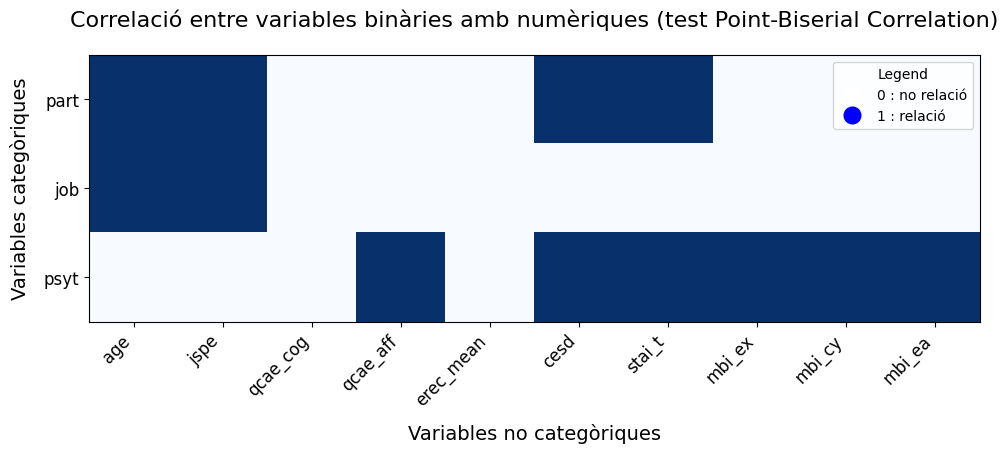

In [5]:
vars_bin = ['part', 'job', 'psyt']

from scipy.stats import pointbiserialr


df_t = df.copy()

M = np.zeros(shape=(len(vars_bin), len(vars_num)))

for i, Vbin in enumerate(vars_bin):
    for j, Vnum in enumerate(vars_num):
        unique_values = df_t[Vbin].dropna().unique()
        if len(unique_values) == 2:
            correlation, p_value = pointbiserialr(df_t[Vbin], df_t[Vnum])
            M[i][j] = p_value < 0.05
        else:
            print(f"Warning: {Vbin} does not have exactly 2 unique values.")


plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='Blues', interpolation='none')

plt.xticks(np.arange(len(vars_num)), vars_num, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(vars_bin)), vars_bin, fontsize=12)

plt.xlabel("Variables no categòriques", fontsize=14, labelpad=10)
plt.ylabel("Variables categòriques", fontsize=14, labelpad=10)
plt.title("Correlació entre variables binàries amb numèriques (test Point-Biserial Correlation)", fontsize=16, pad=20)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='white', markersize=12, linestyle='None', label='0 : no relació'),
    plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=12, linestyle='None', label='1 : relació')
]


plt.legend(handles=legend_handles, loc='upper right', title='Legend')
plt.tight_layout()
plt.show()


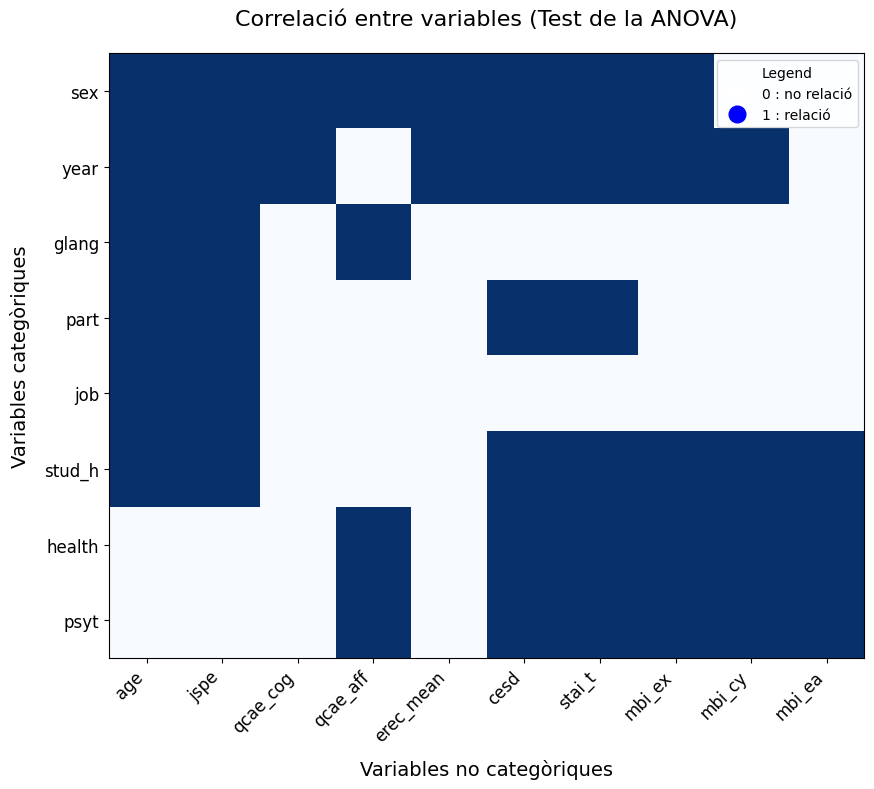

In [6]:
from scipy.stats import f_oneway

df_t = df.copy()
M = np.zeros(shape=(len(vars_categoriques), len(vars_num)))
for i, Vcat in enumerate(vars_categoriques):
    groups = [[group[var].values for _, group in df_t.groupby(Vcat)] for var in vars_num]
    # print("Evaluant:", Vcat)
    for j, g in enumerate(groups):
        f_stat, p_value = f_oneway(*g)
        # print(f"{vars_num[j]} : ANOVA F-statistic: {f_stat}, p-value: {p_value}")
        M[i][j] = p_value < 0.05


plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='Blues', interpolation='none')

plt.xticks(np.arange(len(vars_num)), vars_num, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(vars_categoriques)), vars_categoriques, fontsize=12)

plt.xlabel("Variables no categòriques", fontsize=14, labelpad=10)
plt.ylabel("Variables categòriques", fontsize=14, labelpad=10)
plt.title("Correlació entre variables (Test de la ANOVA)", fontsize=16, pad=20)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='white', markersize=12, linestyle='None', label='0 : no relació'),
    plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=12, linestyle='None', label='1 : relació')
]


plt.legend(handles=legend_handles, loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

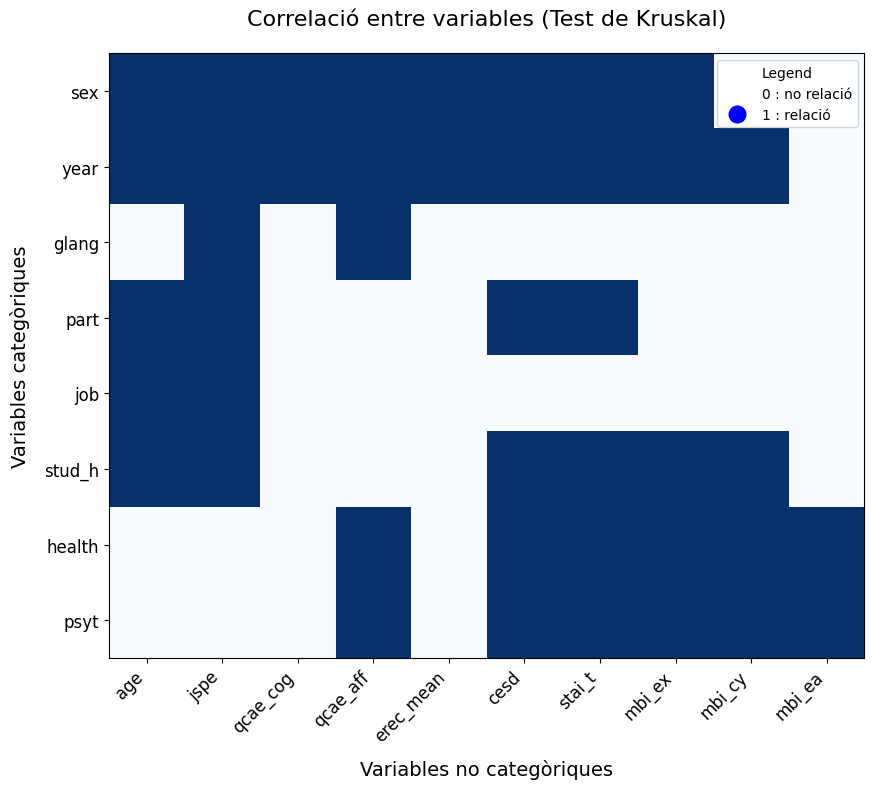

In [7]:
from scipy.stats import kruskal

df_t = df.copy()
M = np.zeros(shape=(len(vars_categoriques), len(vars_num)))
for i, Vcat in enumerate(vars_categoriques):
    groups = [[group[var].values for _, group in df_t.groupby(Vcat)] for var in vars_num]
    # print("Evaluant:", Vcat)
    for j, g in enumerate(groups):
        f_stat, p_value = kruskal(*g)
        # print(f"{vars_num[j]} : Kruskal F-statistic: {f_stat}, p-value: {p_value}")
        M[i][j] = p_value < 0.05


plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='Blues', interpolation='none')

plt.xticks(np.arange(len(vars_num)), vars_num, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(vars_categoriques)), vars_categoriques, fontsize=12)
plt.xlabel("Variables no categòriques", fontsize=14, labelpad=10)
plt.ylabel("Variables categòriques", fontsize=14, labelpad=10)
plt.title("Correlació entre variables (Test de Kruskal)", fontsize=16, pad=20)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='white', markersize=12, linestyle='None', label='0 : no relació'),
    plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=12, linestyle='None', label='1 : relació')
]


plt.legend(handles=legend_handles, loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

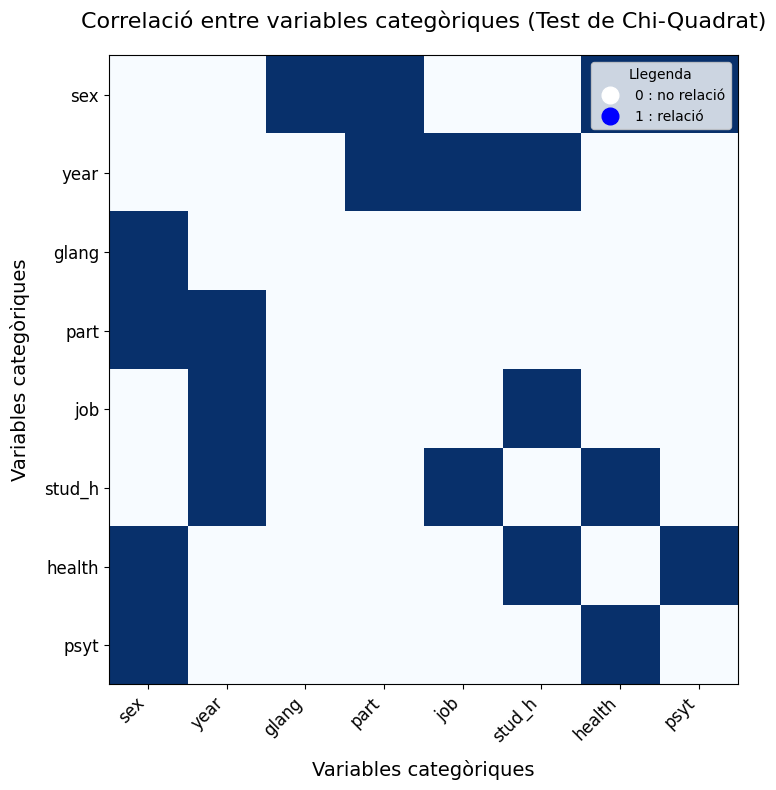

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df_t = df.copy()

M = np.zeros(shape=(len(vars_categoriques), len(vars_categoriques)))

for i, var1 in enumerate(vars_categoriques):
    for j, var2 in enumerate(vars_categoriques):
        if i != j:
            contingency_table = pd.crosstab(df_t[var1], df_t[var2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            M[i][j] = p_value < 0.05

# Plotting the results
plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='Blues', interpolation='none')

# Customize the ticks and labels
plt.xticks(np.arange(len(vars_categoriques)), vars_categoriques, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(vars_categoriques)), vars_categoriques, fontsize=12)

plt.xlabel("Variables categòriques", fontsize=14, labelpad=10)
plt.ylabel("Variables categòriques", fontsize=14, labelpad=10)
plt.title("Correlació entre variables categòriques (Test de Chi-Quadrat)", fontsize=16, pad=20)

# Create a legend
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='white', markersize=12, linestyle='None', label='0 : no relació'),
    plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=12, linestyle='None', label='1 : relació')
]

plt.legend(handles=legend_handles, loc='upper right', title='Llegenda')
plt.tight_layout()
plt.show()

